In [1]:
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from string import punctuation
from nltk import word_tokenize
from nltk.stem import PorterStemmer
import re # baray hazf adad
from collections import defaultdict
import math
import matplotlib.pyplot as plt

In [3]:
def merge_file(filename_list,output_file):
    with open(output_file,'w',encoding='utf-8') as output:
        for input_file in filename_list:
            with open(input_file,'r',encoding = 'utf-8') as input:
                output.write(input.read())
                output.write('\n')


def read_documents(file_path, separator_str):
    with open(file_path,'r',encoding = 'utf-8') as file:
        lines = file.read()
        documents = lines.split(separator_str)

    return documents


def find_counts(word_list):
    word_counts = defaultdict(int)
    for jomalat in word_list:
        for word in jomalat:
            word_counts[word] += 1
    return word_counts


def find_idf_dict(documents,queries):
    idf_dict = {}
    for query in queries:
        for term in query:
            if term not in idf_dict.keys():
                idf_dict[term] = sum(1 for doc in documents if term in doc)
    return idf_dict




def tfidf(term, document, documents,idf_dict):
    term_count = document.count(term)
    tf = term_count
    if term in idf_dict.keys():
        if idf_dict[term] > 0:
            idf = math.log(len(documents) / idf_dict[term])
        else:
            idf = 0
    else:
        idf = 0
    return tf * idf

def find_n_nearest(document_score_lists,n):
    final_n_nearest = []
    for document_score_list in document_score_lists:
        max_items = sorted(enumerate(document_score_list), key=lambda x: (x[1], -x[0]), reverse=True)[:n]
        max_indices = [index + 1 for index, value in max_items] # index + 1 chon az 0 shoroo nashe
        final_n_nearest.append(max_indices)
    return final_n_nearest


def tp(prediction_lists,answer_list):
    tp = []
    i = -1
    for prediction in prediction_lists:
        i = i + 1
        t = 0
        for index in prediction:
            if str(index) in answer_list[i]:
                t = t + 1
        tp.append(t)
    return tp

def fp(prediction_lists,answer_list):
    fp = []
    i = -1
    for prediction in prediction_lists:
        i = i + 1
        t = 0
        for index in prediction:
            if str(index) not in answer_list[i]:
                t = t + 1
        fp.append(t)
    return fp

def fn(prediction_lists,answer_list):
    fn = []
    i = -1
    for answer in answer_list:
        i = i + 1
        t = 0
        for index in answer:
            if int(index) not in prediction_lists[i]:
                t = t + 1
        fn.append(t)
    return fn


In [5]:
input_files = ['lisa/LISA0.001','lisa/LISA0.501','lisa/LISA1.001','lisa/LISA1.501','lisa/LISA2.001','lisa/LISA2.501','lisa/LISA3.001','lisa/LISA3.501',
               'lisa/LISA4.001','lisa/LISA4.501','lisa/LISA5.001','lisa/LISA5.501','lisa/LISA5.627','lisa/LISA5.850']
output_filename = 'merged_file.txt'
merge_file(input_files,output_filename)
all_documents = read_documents(output_filename,'********************************************')

In [7]:
que = read_documents('lisa/LISA.QUE',' #')

In [8]:
del all_documents[6004] # bar asas joori ke merge kardam va jodasazi kardam yek onsor akharesh ezafe mishe /n/n ast ke hazfesh kardam...
del que[35] # yek onsar ezafe mishe ke \n ast va bayad hazf konam...

In [9]:
for i in range(len(all_documents)):
    # hazf "Document    i"
    temp = 'Document    ' + str(i+1)
    all_documents[i] = all_documents[i].replace(temp,'')

In [10]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mahdi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mahdi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [11]:
stemmer = PorterStemmer()

In [12]:
final_documents = []
for i in all_documents:
    tokens = word_tokenize(re.sub(r'\d+|[\n\r\t]', ' ', i)) 
    tokens = [word.lower() for word in tokens]
    translator = str.maketrans('','',punctuation)
    tokens = [word.translate(translator) for word in tokens]
    tokens = [word for word in tokens if not word in stop_words]
    tokens = [word for word in tokens if word != ""]
    tokens = [stemmer.stem(word) for word in tokens]
    final_documents.append(tokens)

In [13]:
final_ques = []
for i in que:
    tokens = word_tokenize(re.sub(r'\d+|[\n\r\t]', ' ', i)) 
    tokens = [word.lower() for word in tokens]
    translator = str.maketrans('','',punctuation)
    tokens = [word.translate(translator) for word in tokens]
    tokens = [word for word in tokens if not word in stop_words]
    tokens = [word for word in tokens if word != ""]
    tokens = [stemmer.stem(word) for word in tokens]
    final_ques.append(tokens)

In [14]:
final_documents

[['indian',
  'council',
  'librari',
  'inform',
  'servic',
  'research',
  'train',
  'propos',
  'consider',
  'critic',
  'examin',
  'indian',
  'librari',
  'scene',
  'manag',
  'oper',
  'servic',
  'librari',
  'ineffici',
  'ineffect',
  'result',
  'grave',
  'misalloc',
  'underutilis',
  'librari',
  'resourc',
  'littl',
  'major',
  'research',
  'carri',
  'univers',
  'librarianship',
  'cours',
  'much',
  'help',
  'manag',
  'oper',
  'librari',
  'effici',
  'major',
  'nation',
  'institut',
  'seriou',
  'limit',
  'improv',
  'situat',
  'propos',
  'establish',
  'indian',
  'council',
  'librari',
  'inform',
  'servic',
  'research',
  'train',
  'council',
  'would',
  'set',
  'govern',
  'welldefin',
  'role',
  'function',
  'cover',
  'aspect',
  'indian',
  'librarianship'],
 ['linger',
  'fragranc',
  'proceed',
  'xxiv',
  'india',
  'librari',
  'confer',
  'bangalor',
  'paper',
  'proceed',
  'confer',
  'summari',
  'nd',
  'bagari',
  'transcrip

In [15]:
final_ques

[['interest',
  'identif',
  'evalu',
  'novel',
  'comput',
  'architectur',
  'instanc',
  'increas',
  'parallel',
  'simd',
  'mimd',
  'machin',
  'also',
  'interest',
  'inform',
  'associ',
  'store',
  'memori',
  'associ',
  'processor',
  'comput',
  'architectur',
  'associ',
  'processor',
  'associ',
  'store',
  'associ',
  'memori'],
 ['would',
  'interest',
  'receiv',
  'inform',
  'nonus',
  'librari',
  'includ',
  'studi',
  'nonus',
  'nonus',
  'would',
  'especi',
  'grate',
  'paper',
  'give',
  'methodolog',
  'approach',
  'use',
  'studi',
  'result',
  'obtain',
  'nonus',
  'librari',
  'use',
  'user',
  'studi'],
 ['interest',
  'comput',
  'document',
  'system',
  'chemic',
  'patent',
  'would',
  'pleas',
  'receiv',
  'inform',
  'either',
  'public',
  'avail',
  'system',
  'inhous',
  'system',
  'chemistri',
  'chemic',
  'patent'],
 ['would',
  'pleas',
  'receiv',
  'inform',
  'use',
  'journal',
  'librari',
  'type',
  'librari',
  'curren

In [16]:
with open('1.txt','w',encoding = 'utf-8') as answer1:
    answer1.write(" ".join(final_documents[0]))
    answer1.write('\n')
    answer1.write(" ".join(final_documents[1]))

In [17]:
unique_word_documents = set()
for words in final_documents:
    unique_word_documents.update(words)
print('unique word counts in word documents',len(unique_word_documents))

unique word counts in word documents 13937


In [18]:
unique_word_documents

{'stockton',
 'abysm',
 'imageprocess',
 'semiconductor',
 'pixel',
 'danmark',
 'von',
 'biphenyl',
 'eastern',
 'parliamentari',
 'monthlong',
 'noyc',
 'metaphys',
 'announc',
 'lowoverhead',
 'synergi',
 'bent',
 'scopal',
 'nonquantit',
 'syntact',
 'knoxvil',
 'sztaba',
 'botterel',
 'databank',
 'rossach',
 'queue',
 'thoughtspeech',
 'belorussia',
 'canon',
 'rathenow',
 'somewhat',
 'duisburg',
 'videom',
 'reread',
 'knew',
 'nonjourn',
 'continu',
 'atlant',
 'computeroutput',
 'maximilian',
 'p',
 'trom',
 'bika',
 'everyday',
 'kommunern',
 'geo',
 'agrisintern',
 'techolog',
 'admiss',
 'appproxim',
 'tippedin',
 'subthem',
 'kate',
 'encrypt',
 'esrin',
 'vincent',
 'oneway',
 'glimps',
 'centurylong',
 'monsoon',
 'singha',
 'aborn',
 'presenc',
 'renter',
 'scientifiqu',
 'chapel',
 'schemat',
 'kansa',
 'paraprofession',
 'separatelypublish',
 'polygraphi',
 'theolog',
 'compon',
 'homecomput',
 'francoamerican',
 'valentina',
 'eurodata',
 'kooyman',
 'investor',
 'w

In [19]:
unique_word_ques = set()
for words in final_ques:
    unique_word_ques.update(words)
print('unique word counts in word queries',len(unique_word_ques))

unique word counts in word queries 449


In [20]:
unique_word_ques

{'abbrevi',
 'academ',
 'access',
 'activ',
 'advic',
 'affect',
 'agricultur',
 'aid',
 'aim',
 'algorithm',
 'almost',
 'also',
 'analys',
 'angl',
 'anyth',
 'applic',
 'approach',
 'architectur',
 'area',
 'articl',
 'artif',
 'asi',
 'assasin',
 'assist',
 'associ',
 'attitud',
 'audiovisu',
 'autom',
 'automat',
 'avail',
 'awar',
 'back',
 'bank',
 'base',
 'basi',
 'behaviour',
 'behind',
 'best',
 'bibliograph',
 'bodi',
 'book',
 'brief',
 'bu',
 'budget',
 'build',
 'bulletin',
 'buy',
 'cai',
 'cair',
 'cal',
 'calcul',
 'card',
 'carri',
 'case',
 'cassett',
 'censorship',
 'center',
 'centr',
 'chang',
 'charact',
 'charg',
 'chemic',
 'chemistri',
 'chines',
 'christian',
 'circul',
 'citi',
 'classif',
 'classroom',
 'cluster',
 'cmi',
 'cml',
 'coeffici',
 'cognit',
 'collect',
 'colour',
 'committe',
 'commun',
 'compar',
 'complement',
 'comput',
 'computer',
 'computeris',
 'concern',
 'conduct',
 'confer',
 'confidenti',
 'conflat',
 'connect',
 'consum',
 'content

In [22]:
# makoos idf
idf_dict_queries = find_idf_dict(final_documents,final_ques)
idf_dict_documents = find_idf_dict(final_documents,final_documents)

In [23]:
idf_dict_documents

{'indian': 57,
 'council': 150,
 'librari': 3553,
 'inform': 2302,
 'servic': 1648,
 'research': 892,
 'train': 421,
 'propos': 248,
 'consider': 171,
 'critic': 105,
 'examin': 467,
 'scene': 30,
 'manag': 397,
 'oper': 415,
 'ineffici': 8,
 'ineffect': 5,
 'result': 627,
 'grave': 3,
 'misalloc': 1,
 'underutilis': 8,
 'resourc': 444,
 'littl': 103,
 'major': 301,
 'carri': 249,
 'univers': 847,
 'librarianship': 349,
 'cours': 238,
 'much': 155,
 'help': 227,
 'effici': 156,
 'nation': 841,
 'institut': 507,
 'seriou': 31,
 'limit': 146,
 'improv': 415,
 'situat': 225,
 'establish': 446,
 'would': 212,
 'set': 315,
 'govern': 398,
 'welldefin': 3,
 'role': 489,
 'function': 334,
 'cover': 396,
 'aspect': 275,
 'linger': 1,
 'fragranc': 1,
 'proceed': 98,
 'xxiv': 1,
 'india': 63,
 'confer': 415,
 'bangalor': 6,
 'paper': 625,
 'summari': 111,
 'nd': 140,
 'bagari': 1,
 'transcript': 14,
 'inaugur': 10,
 'speech': 32,
 'introductori': 20,
 'main': 311,
 'present': 1281,
 'held': 248,

In [ ]:
# i = -1
# queri_weights = [[] for _ in range(len(final_ques))]
# for query in final_ques:
#   i = i + 1
#   for doc in final_documents:
#     tfidf_scores = {}
#     for word in query:
#         score = tfidf(word, doc, final_documents,idf_dict)
#         if word in tfidf_scores:
#             tfidf_scores[word] += score
#         else:
#             tfidf_scores[word] = score
#     document_scores[i].append(sum(tfidf_scores.values()))

In [28]:
# man be in ravesh khodam matrix tf_idf ro baray query va document misakhtam vali nemidoonam be elat zaif boodaan system bood ya chi
# vali code ejra mishod va matris ham sakhte mishod vali vaghti too selool badi mikhastam hata final matrix ro bebinam inghadr 
# feshar mioomad va computer aval chand sanie hang mishod va bad ye lahze neshoon midad va bad jupyter note book crash mikard.
# be hamin dalil man code ha ro pak nakardam va comment kardam va az in be bad az khod tf_idf vectorizer khod sklearn estefade kardam...


# final_matrix = []
# for doc in final_documents:
#     temp = []
#     for i in unique_word_documents:
#         temp.append(tfidf(i,doc,final_documents,idf_dict_documents))
#     final_matrix.append(temp)

# final_query_matrix = []
# for query in final_ques:
#     temp = []
#     for i in unique_word_ques:
#         temp.append(tfidf(i,query,final_documents,idf_dict_documents))
#     final_query_matrix.append(temp)


In [21]:
# final_matrix

[]

In [39]:
final_documents_jomle = []
for i in final_documents:
    final_documents_jomle.append(" ".join(i))
final_queries_jomle = []
for i in final_ques:
    final_queries_jomle.append(" ".join(i))

In [40]:
final_documents_jomle

['indian council librari inform servic research train propos consider critic examin indian librari scene manag oper servic librari ineffici ineffect result grave misalloc underutilis librari resourc littl major research carri univers librarianship cours much help manag oper librari effici major nation institut seriou limit improv situat propos establish indian council librari inform servic research train council would set govern welldefin role function cover aspect indian librarianship',
 'linger fragranc proceed xxiv india librari confer bangalor paper proceed confer summari nd bagari transcript inaugur speech introductori paper main present confer held jan feb',
 'xxv india librari confer trivandrum may paper proceed confer paper relat indian librari situat gener librari state librari librari movement kerala',
 'malawi librari associ second annual gener meet chancellor colleg saturday april summari proceed list present briefli outlin proceed meet whose discuss topic includ membership

In [41]:
final_queries_jomle

['interest identif evalu novel comput architectur instanc increas parallel simd mimd machin also interest inform associ store memori associ processor comput architectur associ processor associ store associ memori',
 'would interest receiv inform nonus librari includ studi nonus nonus would especi grate paper give methodolog approach use studi result obtain nonus librari use user studi',
 'interest comput document system chemic patent would pleas receiv inform either public avail system inhous system chemistri chemic patent',
 'would pleas receiv inform use journal librari type librari current back issu also interest inform way librari cope cut period budget period journal librari user studi cut public librari academ librari univers librari polytechn librari higher educ librari',
 'dissert overview news databas look avail content scope use current avail includ examin user group perceiv realiti specif shall carri brief examin histori develop news databas start new york time inform bank e

In [267]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(norm=None)
vectorizer_documents = vectorizer.fit_transform(final_documents_jomle)
vectorizer_queries = vectorizer.transform(final_queries_jomle)

In [268]:
np.shape(vectorizer_documents.toarray())

(6004, 13918)

In [269]:
from sklearn.metrics.pairwise import cosine_similarity
similarities = cosine_similarity(vectorizer_documents, vectorizer_queries)

In [270]:
similarities

array([[0.00480202, 0.05082938, 0.02456546, ..., 0.08073685, 0.01064874,
        0.02072733],
       [0.        , 0.02287726, 0.        , ..., 0.00959522, 0.        ,
        0.00187612],
       [0.        , 0.05266887, 0.        , ..., 0.0643126 , 0.        ,
        0.01257484],
       ...,
       [0.08852595, 0.        , 0.0008943 , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.0017578 , ..., 0.        , 0.        ,
        0.        ],
       [0.05325984, 0.04428351, 0.05638367, ..., 0.01528314, 0.04489037,
        0.01792959]])

In [271]:
# similarities = 6004 * 35 ... mikahm tabidil she be 35 * 6004 yani emtiazay har query ro joda joda konam...
scores = [[sublist[i] for sublist in similarities] for i in range(len(similarities[0]))]

In [272]:
scores

[[0.004802018585121331,
  0.0,
  0.0,
  0.059266954225778705,
  0.0,
  0.04785999724889166,
  0.04915809929774826,
  0.03681060326963071,
  0.0070463154175201366,
  0.009712046643802642,
  0.0,
  0.0,
  0.022262417240221995,
  0.020836081087722915,
  0.002765785631739272,
  0.0,
  0.006190615829361526,
  0.00422404394220627,
  0.09648486307696123,
  0.0,
  0.0,
  0.0023188980934335654,
  0.03813981505582803,
  0.09071660626218467,
  0.07388887748743678,
  0.005597122383074422,
  0.0,
  0.005053416602904309,
  0.04398688870181394,
  0.057127971468814535,
  0.0533868695272669,
  0.06389794922918343,
  0.18539173168755907,
  0.002116979028427886,
  0.0,
  0.07407731678536365,
  0.0,
  0.0,
  0.07604687859991671,
  0.0,
  0.06241306019892372,
  0.0,
  0.06796142276390635,
  0.0,
  0.0054567276463297594,
  0.01792955209165061,
  0.007671025366314948,
  0.0,
  0.002648357487485191,
  0.013608902867214981,
  0.06457782963729415,
  0.08880392003458802,
  0.0,
  0.004021427164490426,
  0.0,
  0

In [273]:
nearest_5 = find_n_nearest(scores,5)

In [274]:
nearest_10 = find_n_nearest(scores,10)

In [275]:
nearest_20 = find_n_nearest(scores,20)

In [276]:
nearest_40 = find_n_nearest(scores,40)

In [277]:
print(nearest_5)


[[3604, 2540, 3483, 1956, 5852], [4598, 4291, 2624, 580, 5632], [1431, 4743, 234, 1218, 4744], [2700, 167, 180, 4844, 4716], [4952, 4439, 5988, 5931, 3019], [2090, 5627, 3103, 2722, 5626], [1278, 2279, 1277, 345, 1359], [2806, 4478, 5506, 4063, 4469], [3922, 5859, 4374, 3178, 4906], [2407, 770, 1309, 4253, 1310], [2550, 4622, 3317, 4119, 603], [4653, 1141, 382, 2986, 2391], [5000, 5001, 1563, 3607, 2037], [580, 4150, 577, 1165, 4600], [3955, 3796, 1313, 4373, 4366], [2151, 4909, 1234, 2765, 743], [3462, 3477, 782, 5877, 1754], [2426, 3976, 3928, 657, 4400], [1213, 3254, 2280, 270, 3242], [3901, 1497, 2790, 1789, 385], [1898, 395, 1895, 1428, 1822], [4174, 3169, 4265, 688, 171], [716, 5136, 2179, 1790, 4683], [3972, 4391, 2961, 4793, 3398], [3448, 4354, 2898, 5283, 3645], [206, 2214, 5735, 5175, 3721], [5720, 2298, 4170, 1796, 3696], [3434, 2960, 2933, 2404, 2712], [5862, 248, 3736, 1547, 252], [3943, 1922, 915, 2416, 2934], [934, 4284, 4365, 3466, 942], [2172, 395, 3918, 915, 2414], [2

In [278]:
print(nearest_10)



[[3604, 2540, 3483, 1956, 5852, 5522, 3396, 520, 4926, 3696], [4598, 4291, 2624, 580, 5632, 109, 2623, 2853, 5745, 365], [1431, 4743, 234, 1218, 4744, 3225, 2129, 4758, 5218, 1706], [2700, 167, 180, 4844, 4716, 3180, 2510, 5006, 4150, 4084], [4952, 4439, 5988, 5931, 3019, 2023, 4688, 306, 1986, 5933], [2090, 5627, 3103, 2722, 5626, 2886, 5830, 2593, 987, 3610], [1278, 2279, 1277, 345, 1359, 2278, 3343, 5778, 1449, 5779], [2806, 4478, 5506, 4063, 4469, 1044, 3943, 1038, 1522, 1296], [3922, 5859, 4374, 3178, 4906, 2421, 5706, 3907, 3918, 3917], [2407, 770, 1309, 4253, 1310, 2319, 3605, 5801, 769, 4290], [2550, 4622, 3317, 4119, 603, 5493, 3978, 3171, 167, 206], [4653, 1141, 382, 2986, 2391, 3887, 1871, 2988, 983, 5101], [5000, 5001, 1563, 3607, 2037, 5511, 23, 2497, 974, 4056], [580, 4150, 577, 1165, 4600, 576, 5633, 4644, 5236, 4589], [3955, 3796, 1313, 4373, 4366, 3815, 3896, 4282, 1411, 422], [2151, 4909, 1234, 2765, 743, 4192, 1562, 3073, 5815, 3259], [3462, 3477, 782, 5877, 1754, 11

In [279]:
print(nearest_20)

[[3604, 2540, 3483, 1956, 5852, 5522, 3396, 520, 4926, 3696, 4510, 3984, 5006, 33, 517, 1847, 435, 5005, 1005, 3713], [4598, 4291, 2624, 580, 5632, 109, 2623, 2853, 5745, 365, 5697, 5634, 4674, 4845, 2245, 1867, 4600, 577, 4591, 4201], [1431, 4743, 234, 1218, 4744, 3225, 2129, 4758, 5218, 1706, 3919, 1053, 1758, 1112, 1220, 4282, 1707, 3796, 3815, 1313], [2700, 167, 180, 4844, 4716, 3180, 2510, 5006, 4150, 4084, 603, 2208, 4750, 4119, 581, 84, 1570, 3173, 706, 3305], [4952, 4439, 5988, 5931, 3019, 2023, 4688, 306, 1986, 5933, 1109, 1325, 54, 4097, 4385, 1908, 92, 276, 1926, 4732], [2090, 5627, 3103, 2722, 5626, 2886, 5830, 2593, 987, 3610, 3185, 5725, 566, 4155, 5066, 988, 4141, 113, 5038, 5424], [1278, 2279, 1277, 345, 1359, 2278, 3343, 5778, 1449, 5779, 1439, 5189, 1794, 1931, 5748, 2753, 3789, 2351, 5220, 3265], [2806, 4478, 5506, 4063, 4469, 1044, 3943, 1038, 1522, 1296, 40, 1534, 5526, 39, 4505, 5722, 33, 49, 1021, 3716], [3922, 5859, 4374, 3178, 4906, 2421, 5706, 3907, 3918, 3917

In [280]:
print(nearest_40)

[[3604, 2540, 3483, 1956, 5852, 5522, 3396, 520, 4926, 3696, 4510, 3984, 5006, 33, 517, 1847, 435, 5005, 1005, 3713, 5515, 4998, 2906, 3392, 3101, 189, 4657, 936, 1896, 5621, 4216, 343, 1028, 447, 942, 2283, 3045, 437, 5525, 5520], [4598, 4291, 2624, 580, 5632, 109, 2623, 2853, 5745, 365, 5697, 5634, 4674, 4845, 2245, 1867, 4600, 577, 4591, 4201, 4253, 1320, 4102, 1641, 1635, 1506, 213, 5633, 4851, 5937, 4150, 2436, 3769, 1082, 1122, 2679, 5006, 4803, 1649, 1514], [1431, 4743, 234, 1218, 4744, 3225, 2129, 4758, 5218, 1706, 3919, 1053, 1758, 1112, 1220, 4282, 1707, 3796, 3815, 1313, 1407, 1221, 3379, 4637, 1532, 1223, 5243, 3806, 872, 1705, 3955, 3893, 3795, 4366, 4243, 4024, 1499, 3897, 1430, 4390], [2700, 167, 180, 4844, 4716, 3180, 2510, 5006, 4150, 4084, 603, 2208, 4750, 4119, 581, 84, 1570, 3173, 706, 3305, 4200, 1057, 5292, 2302, 4005, 3917, 4441, 2737, 1078, 3528, 2172, 4468, 4665, 2334, 580, 2579, 3179, 159, 85, 530], [4952, 4439, 5988, 5931, 3019, 2023, 4688, 306, 1986, 5933, 1

In [281]:
with open('lisa/LISARJ.NUM' , 'r',encoding = 'utf-8') as output_file:
    answer = output_file.read()

In [282]:
temp = list(filter(lambda x: x.strip(),answer.split('        ')))

In [283]:
temp

['   1',
 '   2',
 '3392',
 '3396',
 '   2',
 '   2',
 '2623',
 '4291',
 '   3',
 '   5',
 '1407',
 '1431',
 '3794',
 '3795',
 '3796',
 '   4',
 '   7',
 ' 604',
 '3527',
 '4644',
 '5087',
 '5112',
 '5113',
 '5295',
 '   5',
 '   1',
 '3401',
 '   6',
 '  18',
 ' 111',
 ' 112',
 ' 113',
 '1100',
 '1581',
 '1582',
 '2090',
 '2616',
 '2620',
 '3647',
 '4155',
 '5066',
 '5068',
 '5626',
 '5627',
 '5628',
 '5629',
 '5631',
 '   7',
 '  14',
 ' 277',
 ' 278',
 ' 279',
 '1277',
 '1278',
 '1769',
 '2279',
 '3265',
 '3267',
 '3450',
 '3789',
 '5220',
 '5748',
 '5778',
 '   8',
 '  26',
 '  40',
 '  49',
 ' 199',
 ' 524',
 ' 697',
 ' 701',
 '1043',
 '1044',
 '1190',
 '1191',
 '1534',
 '1677',
 '2039',
 '2545',
 '3045',
 '3716',
 '4485',
 '4486',
 '4499',
 '4717',
 '5011',
 '5170',
 '5533',
 '5534',
 '5723',
 '5816',
 '   9',
 '  12',
 ' 178',
 ' 680',
 ' 681',
 '1412',
 '3178',
 '3689',
 '3922',
 '4374',
 '4692',
 '4693',
 '5706',
 '5859',
 '  10',
 '  14',
 ' 769',
 ' 770',
 '1309',
 '1310',
 

In [284]:
answers_final = []
current_group = []
group_size = None
flag = 0
for item in temp:
    if group_size is None and flag == 0:
        flag = 1
    elif flag == 1 and group_size is None:
        group_size = int(item.strip())
    else:
        current_group.append(item.strip())
        if len(current_group) == group_size:
            answers_final.append(current_group)
            current_group = []
            group_size = None
            flag = 0


In [285]:
answers_final

[['3392', '3396'],
 ['2623', '4291'],
 ['1407', '1431', '3794', '3795', '3796'],
 ['604', '3527', '4644', '5087', '5112', '5113', '5295'],
 ['3401'],
 ['111',
  '112',
  '113',
  '1100',
  '1581',
  '1582',
  '2090',
  '2616',
  '2620',
  '3647',
  '4155',
  '5066',
  '5068',
  '5626',
  '5627',
  '5628',
  '5629',
  '5631'],
 ['277',
  '278',
  '279',
  '1277',
  '1278',
  '1769',
  '2279',
  '3265',
  '3267',
  '3450',
  '3789',
  '5220',
  '5748',
  '5778'],
 ['40',
  '49',
  '199',
  '524',
  '697',
  '701',
  '1043',
  '1044',
  '1190',
  '1191',
  '1534',
  '1677',
  '2039',
  '2545',
  '3045',
  '3716',
  '4485',
  '4486',
  '4499',
  '4717',
  '5011',
  '5170',
  '5533',
  '5534',
  '5723',
  '5816'],
 ['178',
  '680',
  '681',
  '1412',
  '3178',
  '3689',
  '3922',
  '4374',
  '4692',
  '4693',
  '5706',
  '5859'],
 ['769',
  '770',
  '1309',
  '1310',
  '1807',
  '2318',
  '2319',
  '2321',
  '2407',
  '3814',
  '4290',
  '4804',
  '5800',
  '5801'],
 ['1046'],
 ['358', '114

In [286]:
len(answers_final)

35

In [287]:
answers_final[34]

['738', '1217', '2246', '2284', '2772', '3276', '3799']

In [288]:
tp_5 = tp(nearest_5,answers_final)
tp_10 = tp(nearest_10,answers_final)
tp_20 = tp(nearest_20,answers_final)
tp_40 = tp(nearest_40,answers_final)

In [289]:
tp_5

[0,
 1,
 1,
 0,
 0,
 3,
 3,
 0,
 4,
 4,
 0,
 1,
 2,
 1,
 2,
 2,
 0,
 3,
 3,
 2,
 0,
 0,
 2,
 3,
 1,
 0,
 2,
 2,
 3,
 3,
 3,
 1,
 0,
 1,
 1]

In [290]:
fp_5 = fp(nearest_5,answers_final)
fp_10 = fp(nearest_10,answers_final)
fp_20 = fp(nearest_20,answers_final)
fp_40 = fp(nearest_40,answers_final)

In [291]:
fp_5

[5,
 4,
 4,
 5,
 5,
 2,
 2,
 5,
 1,
 1,
 5,
 4,
 3,
 4,
 3,
 3,
 5,
 2,
 2,
 3,
 5,
 5,
 3,
 2,
 4,
 5,
 3,
 3,
 2,
 2,
 2,
 4,
 5,
 4,
 4]

In [292]:
fn_5 = fn(nearest_5,answers_final)
fn_10 = fn(nearest_10,answers_final)
fn_20 = fn(nearest_20,answers_final)
fn_40 = fn(nearest_40,answers_final)

In [293]:
fn_5

[2,
 1,
 4,
 7,
 1,
 15,
 11,
 26,
 8,
 10,
 1,
 2,
 0,
 10,
 21,
 1,
 7,
 50,
 11,
 4,
 21,
 1,
 16,
 3,
 1,
 10,
 5,
 9,
 30,
 9,
 7,
 6,
 9,
 0,
 6]

In [294]:
recall_5 = []
for x, y in zip(tp_5, fn_5):
    recall_5.append(x/(x+y))
recall_10 = []
for x, y in zip(tp_10, fn_10):
    recall_10.append(x/(x+y))
recall_20 = []
for x, y in zip(tp_20, fn_20):
    recall_20.append(x/(x+y))
recall_40 = []
for x, y in zip(tp_40, fn_40):
    recall_40.append(x/(x+y))

In [295]:
print("mean recall_5:" , np.mean(recall_5))
print("mean recall_10:" , np.mean(recall_10))
print("mean recall_20:" , np.mean(recall_20))
print("mean recall_40:" , np.mean(recall_40))

mean recall_5: 0.22821015397483227
mean recall_10: 0.3366500530733509
mean recall_20: 0.437635168456685
mean recall_40: 0.5327048623603176


In [296]:
precision_5 = []
for x, y in zip(tp_5, fp_5):
    precision_5.append(x/(x+y))
precision_10 = []
for x, y in zip(tp_10, fp_10):
    precision_10.append(x/(x+y))
precision_20 = []
for x, y in zip(tp_20, fp_20):
    precision_20.append(x/(x+y))
precision_40 = []
for x, y in zip(tp_40, fp_40):
    precision_40.append(x/(x+y))

In [297]:
print("mean precision_5:" , np.mean(precision_5))
print("mean precision_10:" , np.mean(precision_10))
print("mean precision_20:" , np.mean(precision_20))
print("mean precision_40:" , np.mean(precision_40))

mean precision_5: 0.30857142857142855
mean precision_10: 0.23999999999999996
mean precision_20: 0.18714285714285717
mean precision_40: 0.1242857142857143


In [298]:
f1_5 = []
for x, y in zip(recall_5, precision_5):
    if x + y != 0:
        f1_5.append(2*x*y/(x+y))
f1_10 = []
for x, y in zip(recall_10, precision_10):
    if x + y != 0:
        f1_10.append(2*x*y/(x+y))
f1_20 = []
for x, y in zip(recall_20, precision_20):
    if x + y != 0:
        f1_20.append(2*x*y/(x+y))
f1_40 = []
for x, y in zip(recall_40, precision_40):
    if x + y != 0:
        f1_40.append(2*x*y/(x+y))

In [299]:
print("mean f1_5:" , np.mean(f1_5))
print("mean f1_10:" , np.mean(f1_10))
print("mean f1_20:" , np.mean(f1_20))
print("mean f1_40:" , np.mean(f1_40))

mean f1_5: 0.29968367227668385
mean f1_10: 0.29288720665259654
mean f1_20: 0.25552127556948667
mean f1_40: 0.20237972834175413


In [300]:
import sklearn.decomposition
svd = sklearn.decomposition.TruncatedSVD(n_components=2).fit(vectorizer_documents)
documents_svd = svd.transform(vectorizer_documents)
queries_svd = svd.transform(vectorizer_queries)

In [301]:
documents_svd

array([[12.74574229, -2.71894034],
       [ 2.25819125, -0.75930118],
       [ 5.0093338 , -3.80546276],
       ...,
       [ 3.64398128,  2.77117446],
       [ 1.88955611,  1.27616654],
       [ 5.05865219,  4.57070204]])

In [302]:
queries_svd

array([[ 2.88755047,  1.28997128],
       [ 4.74491675,  0.18458003],
       [ 3.26017477,  4.35181671],
       [11.09249921, -5.77113414],
       [ 5.53939623,  3.22596494],
       [ 5.21894048, -3.89959755],
       [ 1.95315398,  2.5643076 ],
       [ 6.82812198, -1.50955826],
       [ 7.53953542, -2.18596803],
       [ 4.36549992,  1.98075637],
       [ 5.88796927, -2.9987533 ],
       [ 4.39513799,  0.9633825 ],
       [ 4.65309665, -1.48766067],
       [10.02402746,  1.22228955],
       [ 2.7533554 ,  4.70728729],
       [ 8.90891317,  5.69515052],
       [ 4.70327497,  5.93787077],
       [ 4.48088193,  2.92704272],
       [ 7.56217905,  2.39659246],
       [ 5.39551942,  9.40006844],
       [ 4.58875836,  4.80410132],
       [ 4.12550546, -1.42091454],
       [ 4.0805386 ,  4.94139427],
       [ 3.31134508,  4.28907093],
       [ 3.12115122,  3.39011779],
       [ 5.50359617, -3.19319311],
       [10.81277614,  4.01937971],
       [ 4.7673661 ,  5.84709681],
       [ 6.67827945,

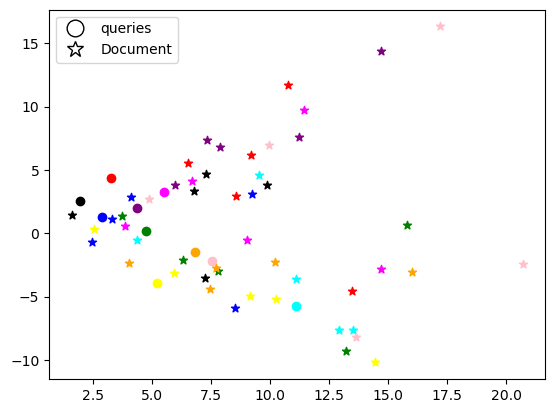

In [303]:
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'orange', 'pink', 'purple'] # color_list

for i in range(10):
    plt.scatter(queries_svd[i][0], queries_svd[i][1], color = colors[i], marker = 'o')

for i in range(10):
    for j in range(5):
        plt.scatter(documents_svd[nearest_5[i][j]][0], documents_svd[nearest_5[i][j]][1], color = colors[i] , marker = '*')
custom_legend = [
    plt.Line2D([0], [0], marker='o', color='w', label='queries', markerfacecolor='none', markersize=12, markeredgecolor='black'),
    plt.Line2D([0], [0], marker='*', color='w', label='Document', markerfacecolor='none', markersize=12, markeredgecolor='black')
]
plt.legend(handles=custom_legend)

plt.show()

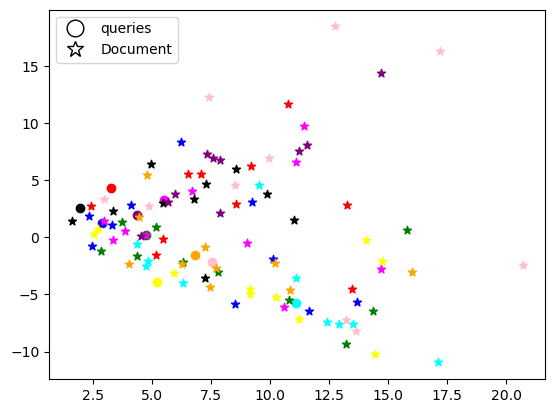

In [304]:
for i in range(10):
    plt.scatter(queries_svd[i][0], queries_svd[i][1], color = colors[i], marker = 'o')

for i in range(10):
    for j in range(10):
        plt.scatter(documents_svd[nearest_10[i][j]][0], documents_svd[nearest_10[i][j]][1],color = colors[i] , marker = '*')

custom_legend = [
    plt.Line2D([0], [0], marker='o', color='w', label='queries', markerfacecolor='none', markersize=12, markeredgecolor='black'),
    plt.Line2D([0], [0], marker='*', color='w', label='Document', markerfacecolor='none', markersize=12, markeredgecolor='black')
]
plt.legend(handles=custom_legend)

plt.show()

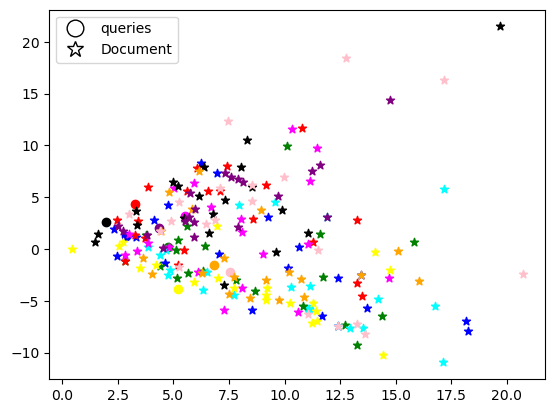

In [305]:
for i in range(10):
    plt.scatter(queries_svd[i][0], queries_svd[i][1], color = colors[i],marker = 'o')

for i in range(10):
    for j in range(20):
        plt.scatter(documents_svd[nearest_20[i][j]][0], documents_svd[nearest_20[i][j]][1],color = colors[i] , marker = '*')

custom_legend = [
    plt.Line2D([0], [0], marker='o', color='w', label='queries', markerfacecolor='none', markersize=12, markeredgecolor='black'),
    plt.Line2D([0], [0], marker='*', color='w', label='Document', markerfacecolor='none', markersize=12, markeredgecolor='black')
]
plt.legend(handles=custom_legend)

plt.show()

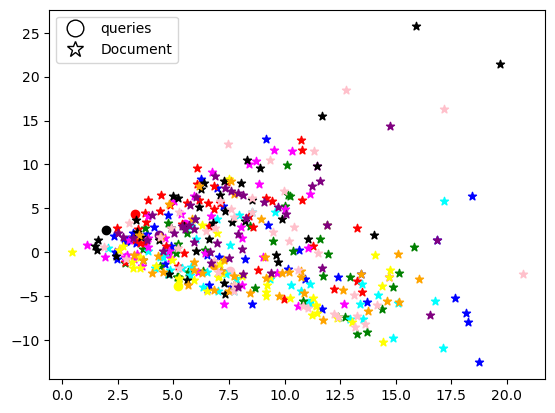

In [306]:
for i in range(10):
    plt.scatter(queries_svd[i][0], queries_svd[i][1], color = colors[i],marker = 'o')

for i in range(10):
    for j in range(40):
        plt.scatter(documents_svd[nearest_40[i][j]][0], documents_svd[nearest_40[i][j]][1],color = colors[i] , marker = '*')

custom_legend = [
    plt.Line2D([0], [0], marker='o', color='w', label='queries', markerfacecolor='none', markersize=12, markeredgecolor='black'),
    plt.Line2D([0], [0], marker='*', color='w', label='Document', markerfacecolor='none', markersize=12, markeredgecolor='black')
]
plt.legend(handles=custom_legend)

plt.show()